In [1]:
import numpy as np
import pandas as pd
from oop_python import ContentFilter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.offline as py
import model_plot


import model as linear
from sklearn import metrics

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
def if_incorrect_row(name):
    data = pd.read_csv(name, header=None,sep=',', comment='#')
    data.columns = [i for i in  data.loc[[0]].values[0]]
    data = data.drop([0])
    data.index = range(data.shape[0])
    return data

data_classification = if_incorrect_row('data_classification.csv')
test_regression = if_incorrect_row('test_regression.csv')
train_regression = if_incorrect_row('train_regression.csv')

data_classification = data_classification.rename(index=str, columns={"sinner/saint": "sinner_saint"})

data_classification[data_classification.columns] = data_classification[data_classification.columns].apply(pd.to_numeric, errors='coerce')
test_regression[test_regression.columns] = test_regression[test_regression.columns].apply(pd.to_numeric, errors='coerce')
train_regression[train_regression.columns] = train_regression[train_regression.columns].apply(pd.to_numeric, errors='coerce')

test_regression = linear.normalize_data(test_regression)
train_regression = linear.normalize_data(train_regression)


print(data_classification)
print(test_regression)
print(train_regression)

     missedDeadlinesIndex  plagiarismRatio  sinner_saint
0                0.051267         0.699560             1
1               -0.092742         0.684940             1
2               -0.213710         0.692250             1
3               -0.375000         0.502190             1
4               -0.513250         0.465640             1
5               -0.524770         0.209800             1
6               -0.398040         0.034357             1
7               -0.305880        -0.192250             1
8                0.016705        -0.404240             1
9                0.131910        -0.513890             1
10               0.385370        -0.565060             1
11               0.529380        -0.521200             1
12               0.638820        -0.243420             1
13               0.736750        -0.184940             1
14               0.546660         0.487570             1
15               0.322000         0.582600             1
16               0.166470      

# Ploting data

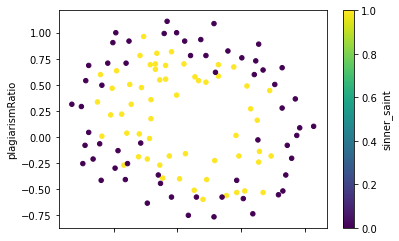

In [3]:
# For  Classification
ax1 = data_classification.plot.scatter(x='missedDeadlinesIndex',y='plagiarismRatio',c='sinner_saint',colormap='viridis')

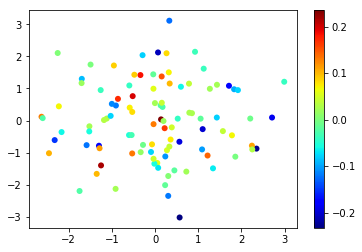

In [4]:
from sklearn.decomposition import PCA
predictors = train_regression.columns.drop(['y'])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_regression[predictors])
data_pca_result = pd.DataFrame(pca_result,columns=['x1', 'x2'])
data_pca_result['y'] = train_regression['y']

for i in data_pca_result.index:
    data_pca_result['y'].loc[i] = data_pca_result['y'].loc[i] / 10

points = plt.scatter(data_pca_result.x1, data_pca_result.x2, c=data_pca_result.y,cmap="jet", lw=0)
plt.colorbar(points)
#################################### !
#################################### !
#################################### !
predictors = train_regression.columns.drop(['y'])


tsne_data = pd.DataFrame(TSNE(n_components=2).fit_transform(train_regression[predictors].values),columns=['x1', 'x2'])
tsne_data['y'] = data_pca_result['y']

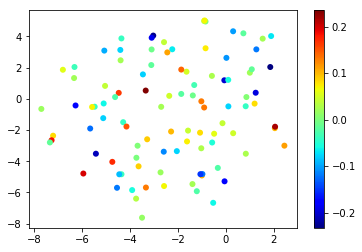

In [5]:
points1 = plt.scatter(tsne_data.x1, tsne_data.x2, c=tsne_data.y,cmap="jet", lw=0)
plt.colorbar(points1)

In [6]:
def modelfitAccurasy(alg, dtrain, dtest,target_train, target_test):
    
    alg, lst = model_plot.modelfit_for_classification(alg, dtrain, dtest,target_train, target_test, True)
    return alg

def split_data_for_Linear_reg_imp(data_train, data_test, target, predictors):
    
    X_train = data_train[predictors].values
    y_train = data_train[target].values.flatten()
    X_test = data_test[predictors].values
    y_test = data_test[target].values.flatten()

    return X_train, y_train, X_test, y_test

def modelfitRegresion(alg, dtrain, dtest,target_train, target_test):
    
    alg, lst = model_plot.modelfit_Regresion(alg, dtrain, dtest,target_train, target_test, True)
    return alg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2019-04-04 16:03:02] Features: 1/10 -- score: -0.9827763871482246[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2019-04-04 16:03:02] Features: 2/10 -- score: -0.9338072892402358[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2019-04-04 16:03:02] Features: 3/10 -- score: -0.9289923409666404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



[2019-04-04 16:03:02] Features: 8/10 -- score: -1.0227567509388371[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2019-04-04 16:03:02] Features: 9/10 -- score: -1.0731912691519834[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2019-04-04 16:03:02] Features: 10/10 -- score: -1.13442637711333

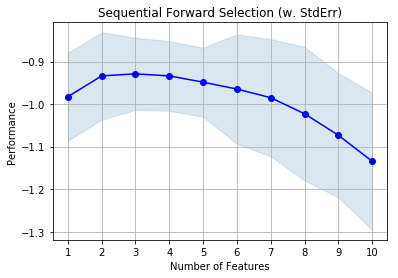

('x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10')
We shuld use : Index(['x1', 'x2', 'x3'], dtype='object')


In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


from sklearn.linear_model import Ridge
#clf = Ridge(alpha=0.8)
#model_Ridge = modelfitRegresion(clf, train_regression[column], test_regression[column], target_train, target_train)

from sklearn import datasets, linear_model


predictors = train_regression.columns.drop(['y'])
X = train_regression[predictors]
y = train_regression['y']


#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
linearModel = Ridge(alpha=0.8)
linearModel.fit(X, y)


sfs1 = sfs(linearModel,k_features=10,forward=True,floating=False,verbose=2,scoring='neg_mean_squared_error',cv=5)
sfs1 = sfs1.fit(X, y)
print(list(sfs1.k_feature_idx_))


from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


print(sfs1.k_feature_names_)
predictors_for_regresion = train_regression.columns.drop([i for i in train_regression.columns if i not in ['x1', 'x2', 'x3']])
target = 'y'
print('We shuld use :', predictors_for_regresion)

In [8]:
data_classification['x1'] = data_classification['missedDeadlinesIndex']**2
data_classification['x2'] = data_classification['plagiarismRatio']**2
data_classification['x3'] = data_classification['missedDeadlinesIndex'] * data_classification['plagiarismRatio']
data_classification['x4'] = (data_classification['missedDeadlinesIndex'] + data_classification['plagiarismRatio'])/2

# Task 1

In [9]:
data_classification = shuffle(data_classification)
train_df, test_df, Y_train, Y_test =  train_test_split (data_classification, data_classification['sinner_saint'], test_size = 0.20, random_state=42)
predictors_of_data_classification = data_classification.columns.drop(['sinner_saint'])

In [10]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(max_depth=10000,n_estimators=1000)
model_RandomForestClassifier = modelfitAccurasy(model1, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test) 

Model report ############################################### !
Accuracy on train ==  1.0
f1_score_train ==  1.0
ROC on train ==  1.0
AUC on train ==  nan
############################################################ !
Accuracy on test ==  1.0
f1_score on test ==  0.7722960151802657
ROC on test ==  1.0
AUC on test ==  nan
End of model report ######################################## !


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



In [11]:
model2 = linear.LogisticRegression(0.5600000000000003,0.8,'l2',1e-10)
model_lr_impl = modelfitAccurasy(model2, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)

Epoch:   1 Loss: 0.7603904581830996
Epoch:   2 Loss: 0.7427249777292984
Epoch:   3 Loss: 0.7297171077569508
Epoch:   4 Loss: 0.720542000265125
Epoch:   5 Loss: 0.7145990263246529
Epoch:   6 Loss: 0.711445145340867
Epoch:   7 Loss: 0.7107481552233269
Epoch:   8 Loss: 0.7122540753836245
Epoch:   9 Loss: 0.7157644581553723
Epoch:  10 Loss: 0.7211206195349243
Epoch:  11 Loss: 0.7281926670941176
Epoch:  12 Loss: 0.7368718434483986
Epoch:  13 Loss: 0.7470651579795462
Epoch:  14 Loss: 0.7586915978162765
Epoch:  15 Loss: 0.7716794302003482
Epoch:  16 Loss: 0.7859642610752918
Epoch:  17 Loss: 0.80148761976882
Epoch:  18 Loss: 0.81819591168725
Epoch:  19 Loss: 0.8360396302788697
Epoch:  20 Loss: 0.8549727532839906
Epoch:  21 Loss: 0.8749522713901114
Epoch:  22 Loss: 0.8959378132279816
Epoch:  23 Loss: 0.9178913414898897
Epoch:  24 Loss: 0.9407769024041663
Epoch:  25 Loss: 0.9645604159365151
Epoch:  26 Loss: 0.9892094976432095
Epoch:  27 Loss: 1.0146933055731873
Epoch:  28 Loss: 1.040982407346168

Epoch: 245 Loss: 8.968481501633747
Epoch: 246 Loss: 8.991896394163765
Epoch: 247 Loss: 9.01517043709305
Epoch: 248 Loss: 9.038304233355802
Epoch: 249 Loss: 9.061298387900651
Epoch: 250 Loss: 9.08415350757422
Epoch: 251 Loss: 9.106870201007254
Epoch: 252 Loss: 9.129449078503223
Epoch: 253 Loss: 9.151890751929384
Epoch: 254 Loss: 9.174195834610227
Epoch: 255 Loss: 9.196364941223282
Epoch: 256 Loss: 9.21839868769723
Epoch: 257 Loss: 9.240297691112282
Epoch: 258 Loss: 9.26206256960278
Epoch: 259 Loss: 9.28369394226197
Epoch: 260 Loss: 9.30519242904892
Epoch: 261 Loss: 9.326558650697539
Epoch: 262 Loss: 9.347793228627639
Epoch: 263 Loss: 9.368896784858032
Epoch: 264 Loss: 9.389869941921596
Epoch: 265 Loss: 9.410713322782291
Epoch: 266 Loss: 9.43142755075408
Epoch: 267 Loss: 9.452013249421706
Epoch: 268 Loss: 9.47247104256333
Epoch: 269 Loss: 9.492801554074928
Epoch: 270 Loss: 9.513005407896516
Epoch: 271 Loss: 9.533083227940018
Epoch: 272 Loss: 9.55303563801891
Epoch: 273 Loss: 9.5728632617

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



# Task 2

In [12]:
train_regression = linear.normalize_data(train_regression)
test_regression = linear.normalize_data(test_regression)
column =  train_regression.columns.drop([i for i in train_regression.columns if i not in ['x1','x2','x3']])
column1 = train_regression.columns.drop(['y'])

In [23]:
model2 = linear.LinearRegression(regularization="l1")
target_train = train_regression['y']
target_test = test_regression['y']

model_lreg_impl = modelfitRegresion(model2, train_regression[column1], test_regression[column1], target_train, target_train)

Epoch:   1 Loss: 2.0490960897667065
Epoch:   2 Loss: 2.0448475565296844
Epoch:   3 Loss: 2.0406363421387215
Epoch:   4 Loss: 2.036462084643548
Epoch:   5 Loss: 2.0323244259321176
Epoch:   6 Loss: 2.028223011686873
Epoch:   7 Loss: 2.0241574913415397
Epoch:   8 Loss: 2.0201275180384313
Epoch:   9 Loss: 2.0161327485862715
Epoch:  10 Loss: 2.0121728434185213
Epoch:  11 Loss: 2.0082474665522057
Epoch:  12 Loss: 2.0043562855472303
Epoch:  13 Loss: 2.0004989714661896
Epoch:  14 Loss: 1.9966751988346556
Epoch:  15 Loss: 1.9928846456019358
Epoch:  16 Loss: 1.9891269931023068
Epoch:  17 Loss: 1.9854019260167113
Epoch:  18 Loss: 1.9817091323349068
Epoch:  19 Loss: 1.9780483033180711
Epoch:  20 Loss: 1.9744191334618546
Epoch:  21 Loss: 1.9708213204598692
Epoch:  22 Loss: 1.9672545651676148
Epoch:  23 Loss: 1.9637185715668395
Epoch:  24 Loss: 1.960213046730315
Epoch:  25 Loss: 1.9567377007870412
Epoch:  26 Loss: 1.9532922468878642
Epoch:  27 Loss: 1.9498764011714904
Epoch:  28 Loss: 1.946489882730

Epoch: 359 Loss: 1.748295302635128
Epoch: 360 Loss: 1.748560785647893
Epoch: 361 Loss: 1.7488251075827064
Epoch: 362 Loss: 1.7490882727393853
Epoch: 363 Loss: 1.7493502854128034
Epoch: 364 Loss: 1.7496111498927158
Epoch: 365 Loss: 1.7498708704635946
Epoch: 366 Loss: 1.7501294514044603
Epoch: 367 Loss: 1.7503868969887235
Epoch: 368 Loss: 1.7506432114840238
Epoch: 369 Loss: 1.7508983991520775
Epoch: 370 Loss: 1.7511524642485221
Epoch: 371 Loss: 1.7514054110227688
Epoch: 372 Loss: 1.7516572437178555
Epoch: 373 Loss: 1.7519079665703021
Epoch: 374 Loss: 1.7521575838099737
Epoch: 375 Loss: 1.7524060996599382
Epoch: 376 Loss: 1.7526535183363336
Epoch: 377 Loss: 1.7528998440482357
Epoch: 378 Loss: 1.7531450809975269
Epoch: 379 Loss: 1.753389233378773
Epoch: 380 Loss: 1.753632305379095
Epoch: 381 Loss: 1.753874301178048
Epoch: 382 Loss: 1.7541152249475034
Epoch: 383 Loss: 1.754355080851532
Epoch: 384 Loss: 1.7545938730462902
Epoch: 385 Loss: 1.7548316056799047
Epoch: 386 Loss: 1.755068282892368

In [14]:
model2 = linear.LinearRegression(regularization="l2")
model_lreg_impl = modelfitRegresion(model2, train_regression[column1], test_regression[column1], target_train, target_train)

Epoch:   1 Loss: 1.0590960897667065
Epoch:   2 Loss: 1.0570054278560765
Epoch:   3 Loss: 1.0549457210604438
Epoch:   4 Loss: 1.0529165639900149
Epoch:   5 Loss: 1.0509175564044113
Epoch:   6 Loss: 1.0489483031474327
Epoch:   7 Loss: 1.0470084140826568
Epoch:   8 Loss: 1.0450975040298514
Epoch:   9 Loss: 1.043215192702207
Epoch:  10 Loss: 1.0413611046443618
Epoch:  11 Loss: 1.0395348691712216
Epoch:  12 Loss: 1.037736120307553
Epoch:  13 Loss: 1.0359644967283521
Epoch:  14 Loss: 1.0342196416999716
Epoch:  15 Loss: 1.032501203021994
Epoch:  16 Loss: 1.0308088329698488
Epoch:  17 Loss: 1.0291421882381608
Epoch:  18 Loss: 1.0275009298848155
Epoch:  19 Loss: 1.0258847232757424
Epoch:  20 Loss: 1.024293238030395
Epoch:  21 Loss: 1.022726147967931
Epoch:  22 Loss: 1.021183131054072
Epoch:  23 Loss: 1.0196638693486422
Epoch:  24 Loss: 1.0181680489537774
Epoch:  25 Loss: 1.016695359962784
Epoch:  26 Loss: 1.0152454964096598
Epoch:  27 Loss: 1.0138181562192474
Epoch:  28 Loss: 1.0124130411580297

Epoch: 307 Loss: 0.9519090265082913
Epoch: 308 Loss: 0.9520200407637042
Epoch: 309 Loss: 0.9521310662723705
Epoch: 310 Loss: 0.9522420967860252
Epoch: 311 Loss: 0.9523531261587821
Epoch: 312 Loss: 0.9524641483457862
Epoch: 313 Loss: 0.9525751574018684
Epoch: 314 Loss: 0.9526861474802327
Epoch: 315 Loss: 0.9527971128311441
Epoch: 316 Loss: 0.952908047800646
Epoch: 317 Loss: 0.9530189468292845
Epoch: 318 Loss: 0.9531298044508563
Epoch: 319 Loss: 0.9532406152911642
Epoch: 320 Loss: 0.953351374066796
Epoch: 321 Loss: 0.953462075583914
Epoch: 322 Loss: 0.9535727147370617
Epoch: 323 Loss: 0.9536832865079817
Epoch: 324 Loss: 0.9537937859644567
Epoch: 325 Loss: 0.9539042082591545
Epoch: 326 Loss: 0.9540145486284968
Epoch: 327 Loss: 0.9541248023915377
Epoch: 328 Loss: 0.9542349649488533
Epoch: 329 Loss: 0.9543450317814541
Epoch: 330 Loss: 0.9544549984497022
Epoch: 331 Loss: 0.9545648605922464
Epoch: 332 Loss: 0.9546746139249709
Epoch: 333 Loss: 0.9547842542399559
Epoch: 334 Loss: 0.954893777404

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: Unde

Accuracy on train
f1_score on test
ROC on test
AUC on test


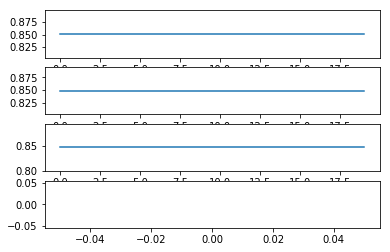

In [15]:
from sklearn.linear_model import LogisticRegression
from model_plot import Plot_metrics_of_models
lst_model = [LogisticRegression(C=c) for c in np.arange(1,1.2,0.01)]
#model_plot.lst_metrix_plot(lst_model, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)
#print([c for c in np.arange(1,10,0.01)])
#lst_model = [LogisticRegression(C=0.875,tol=0.0001) for tol in np.arange(0.0001,0.01,0.001)]
#model_plot.lst_metrix_plot(lst_model, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)

plot_models = Plot_metrics_of_models(lst_model, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test,'C')

plot_models.plot_metrics()




In [16]:
model_LogisticRegression = LogisticRegression(C=0.2)#C=0.8,tol=0.5600000000000003
model_LogisticRegression = modelfitAccurasy(model_LogisticRegression, train_df[predictors_of_data_classification], test_df[predictors_of_data_classification],Y_train, Y_test)


Model report ############################################### !
Accuracy on train ==  0.7872340425531915
f1_score_train ==  0.7824074074074073
ROC on train ==  0.780909090909091
AUC on train ==  nan
############################################################ !
Accuracy on test ==  0.7872340425531915
f1_score on test ==  0.6666666666666666
ROC on test ==  0.780909090909091
AUC on test ==  nan
End of model report ######################################## !


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:651: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



Root mean sq error on test
Mean squared error on test
Mean absolute error on test
r2 score on test


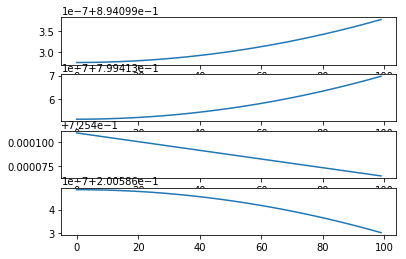

In [17]:
from sklearn.linear_model import Ridge
#clf = Ridge(alpha=0.8)
#model_Ridge = modelfitRegresion(clf, train_regression[column1], test_regression[column1], target_train, target_train)

lst_model = [Ridge(alpha=a) for a in np.arange(0.0000001,0.1,0.001)]
plot_models = Plot_metrics_of_models(lst_model, train_regression[column1], test_regression[column1], target_train, target_train)

plot_models.plot_metrics()

In [18]:
clf = Ridge(alpha=0.001*60)
model_Ridge = modelfitRegresion(clf, train_regression[column1], test_regression[column1], target_train, target_train)


Model report ############################################### !
Root mean sq error on train:  0.8940993134543547
Mean squared error on train:  0.7994135823195484
Mean absolute error on train:  0.7254822266429669
r2 score on train:  0.2005864176804515
############################################################ !
Root mean sq error on test:  0.8940993134543547
Mean squared error on test:  0.7994135823195484
Mean absolute error on test:  0.7254822266429669
r2 score on test:  0.2005864176804515
End of model report ######################################## !


Root mean sq error on test
Mean squared error on test
Mean absolute error on test
r2 score on test


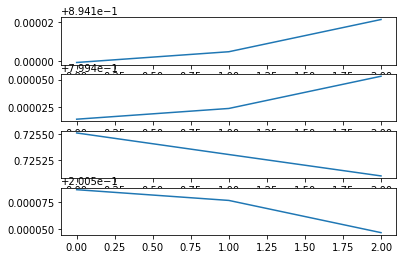

In [19]:
from sklearn.linear_model import Lasso
#clf = linear_model.Lasso(alpha=0.1)
lst_model = [Lasso(alpha=a) for a in np.arange(0.0000001,0.02/7,0.001)]
plot_models = Plot_metrics_of_models(lst_model, train_regression[column1], test_regression[column1], target_train, target_train)
plot_models.plot_metrics()

In [20]:
clf = Lasso(alpha=1.25*0.001)
model_Lasso = modelfitRegresion(clf, train_regression[column1], test_regression[column1], target_train, target_train)


Model report ############################################### !
Root mean sq error on train:  0.8941079048403632
Mean squared error on train:  0.799428945498024
Mean absolute error on train:  0.7252480494811709
r2 score on train:  0.20057105450197588
############################################################ !
Root mean sq error on test:  0.8941079048403632
Mean squared error on test:  0.799428945498024
Mean absolute error on test:  0.7252480494811709
r2 score on test:  0.20057105450197588
End of model report ######################################## !
